In [29]:
# Required to render plots inline in the jupyter notebook.
%matplotlib inline
# math allows for mathematical calculations for floating point numbers.
# sys is a common utility script.
# os allows for interactivity with the operating system.
# numpy as np allows for matrix calculations.
import math,sys,os,numpy as np
# random returns random floats from a specified interval.
from numpy.random import random
# pyplot allows for plotting graphs
# rcParams allow for styling of graphs
# animation allows for creating animations of a plot.
from matplotlib import pyplot as plt, rcParams, animation, rc
# __future__ ensures that future statements run on python versions
# post version 2.1
from __future__ import print_function, division
# interact creates a UI for exploring code + data interactively.
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
# 
rc('animation', html='html5')
# Manually changing the size of the plot figures.
rcParams['figure.figsize'] = 3, 3
# Precision is set to 4 decimal places.
%precision 4
# Numpy function that detrmines the precision of numpy arrays(4 decimal places, 100 chars per line)
np.set_printoptions(precision=4, linewidth=100)

In [30]:
def lin(a,b,x):
    return a*x+b

In [31]:
a=3.
b=8.

In [32]:
n=30
x = random(n)
y = lin(a,b,x)

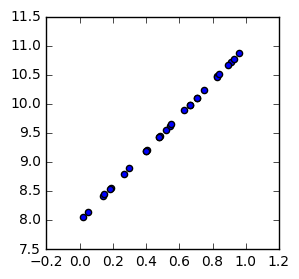

In [33]:
plt.scatter(x,y)

In [34]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [35]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

9.1780

In [36]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [37]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [38]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani